# Import Library

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [68]:
df = pd.read_csv("orderdataset.csv", delimiter=';')
df.head(5)

,order_id,quantity,product_id,price,seller_id,freight_value,customer_id,order_status,purchase_date,payment_type,product_category_name,product_weight_gram
0,2e7a8482f6fb09756ca50c10d7bfc047,2,f293394c72c9b5fafd7023301fc21fc2,1489000,1554a68530182680ad5c8b042c3ab563,28000,08c5351a6aca1c1589a38f244edeee9d,shipped,05/09/2016,virtual account,fashion,1800.0
1,2e7a8482f6fb09756ca50c10d7bfc047,1,c1488892604e4ba5cff5b4eb4d595400,1756000,1554a68530182680ad5c8b042c3ab563,45000,08c5351a6aca1c1589a38f244edeee9d,shipped,05/09/2016,virtual account,automotive,1400.0
2,e5fa5a7210941f7d56d0208e4e071d35,1,f3c2d01a84c947b078e32bbef0718962,1707000,a425f92c199eb576938df686728acd20,174000,683c54fc24d40ee9f8a6fc179fd9856c,canceled,05/09/2016,e-wallet,toys,700.0
3,3b697a20d9e427646d92567910af6d57,1,3ae08df6bcbfe23586dd431c40bddbb7,3071000,522620dcb18a6b31cd7bdf73665113a9,154000,355077684019f7f60a031656bd7262b8,delivered,03/10/2016,e-wallet,utilities,300.0
4,71303d7e93b399f5bcd537d124c0bcfa,1,d2998d7ced12f83f9b832f33cf6507b6,3833000,25e6ffe976bd75618accfe16cefcbd0d,147000,b106b360fe2ef8849fbbd056f777b4d5,canceled,03/10/2016,e-wallet,fashion,500.0


# Check the number of data, data type, and null values

In [69]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49999 entries, 0 to 49998
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               49999 non-null  object 
 1   quantity               49999 non-null  int64  
 2   product_id             49999 non-null  object 
 3   price                  49999 non-null  int64  
 4   seller_id              49999 non-null  object 
 5   freight_value          49999 non-null  int64  
 6   customer_id            49999 non-null  object 
 7   order_status           49999 non-null  object 
 8   purchase_date          49999 non-null  object 
 9   payment_type           49999 non-null  object 
 10  product_category_name  49999 non-null  object 
 11  product_weight_gram    49980 non-null  float64
dtypes: float64(1), int64(3), object(8)
memory usage: 4.6+ MB
None


In [70]:
print(df.isnull().sum())

order_id                  0
quantity                  0
product_id                0
price                     0
seller_id                 0
freight_value             0
customer_id               0
order_status              0
purchase_date             0
payment_type              0
product_category_name     0
product_weight_gram      19
dtype: int64


In [71]:
null_product_weight = df[df['product_weight_gram'].isnull()]
print(null_product_weight)

                               order_id  quantity  \
1193   85f8ad45e067abd694b627859fa57453         1   
5624   eb855beb3ac99461f7a076b4c3652472         1   
6284   a2456e7f02197951664897a94c87242d         1   
6312   e3daea0200104991cb979c2fcc509ae7         1   
6433   6f497c40431d5fb0cfbd6c943dd29215         1   
6480   1521c6bb7b1028154c8c67cf80fa809f         1   
6499   415cfaaaa8cea49f934470548797fed1         2   
6500   415cfaaaa8cea49f934470548797fed1         1   
6555   101157d4fae1c9fb74a00a5dee265c25         1   
7046   c1424efcde3c9e9febd9e1761667789e         1   
8452   ddf16d77e858a32f36e10c289a28ef61         1   
8453   ddf16d77e858a32f36e10c289a28ef61         1   
14008  d38dcb503cd4ddc6ce7702552918bd8f         2   
14009  d38dcb503cd4ddc6ce7702552918bd8f         1   
16301  6e150190fbe04c642a9cf0b80d83ee16         1   
17353  bf49f84a0580ef6751e13357776b7ed9         1   
18183  bbfc7badbed2f1828e22b6d629201bd4         1   
23218  595316a07cd3dea9db7adfcc7e247ae7       

# Drop the null values

In [72]:
df = df.dropna(subset=['product_weight_gram'])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 49980 entries, 0 to 49998
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               49980 non-null  object 
 1   quantity               49980 non-null  int64  
 2   product_id             49980 non-null  object 
 3   price                  49980 non-null  int64  
 4   seller_id              49980 non-null  object 
 5   freight_value          49980 non-null  int64  
 6   customer_id            49980 non-null  object 
 7   order_status           49980 non-null  object 
 8   purchase_date          49980 non-null  object 
 9   payment_type           49980 non-null  object 
 10  product_category_name  49980 non-null  object 
 11  product_weight_gram    49980 non-null  float64
dtypes: float64(1), int64(3), object(8)
memory usage: 5.0+ MB
None


In [73]:
print(df.describe())

           quantity         price  freight_value  product_weight_gram
count  49980.000000  4.998000e+04   49980.000000         49980.000000
mean       1.197519  2.607874e+06  104518.707483          2201.830892
std        0.722372  1.388282e+06   55180.931697          3929.896875
min        1.000000  2.000000e+05    9000.000000            50.000000
25%        1.000000  1.411000e+06   57000.000000           300.000000
50%        1.000000  2.610000e+06  104000.000000           800.000000
75%        1.000000  3.810000e+06  152000.000000          1850.000000
max       21.000000  5.000000e+06  200000.000000         40425.000000


# Only use the data that are not canceled or unavaliable for futher analysis about revenue

In [77]:
unique_categories = df['order_status'].value_counts()
print("Unique order_status:\n", unique_categories)

Unique order_status:
 order_status
delivered      48645
shipped          567
processing       270
canceled         267
invoiced         221
unavailable        7
approved           3
Name: count, dtype: int64


In [74]:
dftemp = df
df_approved = df[(df['order_status'] != 'canceled') & (df['order_status'] != 'unavailable')].copy()
print(df_approved.info())

<class 'pandas.core.frame.DataFrame'>
Index: 49706 entries, 0 to 49998
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               49706 non-null  object 
 1   quantity               49706 non-null  int64  
 2   product_id             49706 non-null  object 
 3   price                  49706 non-null  int64  
 4   seller_id              49706 non-null  object 
 5   freight_value          49706 non-null  int64  
 6   customer_id            49706 non-null  object 
 7   order_status           49706 non-null  object 
 8   purchase_date          49706 non-null  object 
 9   payment_type           49706 non-null  object 
 10  product_category_name  49706 non-null  object 
 11  product_weight_gram    49706 non-null  float64
dtypes: float64(1), int64(3), object(8)
memory usage: 4.9+ MB
None


In [75]:
df_approved['price'] = pd.to_numeric(df_approved['price'], errors='coerce')
df_approved['quantity'] = pd.to_numeric(df_approved['quantity'], errors='coerce')

df_approved['total_amount'] = df_approved['price'] * df_approved['quantity']

product_sales = df_approved.groupby('product_id')['total_amount'].sum().reset_index()
product_sales = product_sales.rename(columns={'total_amount': 'total_sales_amount'})
top_product_sales = product_sales.sort_values(by='total_sales_amount', ascending=False).head(10)
print("Top 10 product sales:\n", top_product_sales)

Top 10 product sales:
                              product_id  total_sales_amount
4343   422879e10f46682990de24d770e7f83d          1243964000
10025  99a4788cb24856965c36a24e339b6058          1028276000
3712   389d119b48cf3043d311335e499d9c6b           780584000
5503   53759a2ecddad2bb87a079a1f1519f73           715026000
9732   9571759451b1d780ee7c15012ea109d4           627470000
3572   368c6c730842d78016ad823897a372db           613350000
1424   154e7e31ebfa092203795c972e5804a6           596916000
13977  d5991653e037ccb7af6ed7d94246b249           496697000
8151   7c1bd920dbdf22470b68bde975dd3ccf           471974000
2623   270516a3f41dc035aa87d220228f844c           442546000


In [76]:
top_product_sales = product_sales.sort_values(by='total_sales_amount', ascending=True).head(10)
print("Worst 10 product sales:\n", top_product_sales)

Worst 10 product sales:
                              product_id  total_sales_amount
13125  c8f6689f642d2ac60ff34490bb59fc9a              201000
3869   3b027a2faa13b442a89696f121015474              201000
6334   60deed43085d22ed6326c2f10336d8c4              201000
4692   4761d3c7046053dc1fdac1470b1b9b27              203000
540    08732e5164f3bd37bb941e5ae9710e6e              203000
3700   3881e42dae9f77fcbaf9f23020b7ef44              203000
14264  da662963d06871d0e88300f9c6df43ee              204000
5566   54775e8961e1b9875d235541a2048ddc              204000
1798   1a986b4015f20a3c26d8573a46dcf65e              205000
10919  a78e2e8f49106bb2123fe7541fa86640              206000


In [78]:
unique_categories = df_approved['product_category_name'].unique()
print("Unique product categories:\n", unique_categories)

Unique product categories:
 ['fashion' 'automotive' 'utilities' 'electronics' 'toys' 'beauty' 'sports'
 'gadget']


In [79]:
category_sales = df_approved.groupby('product_category_name')['quantity'].sum().reset_index()
category_sales = category_sales.rename(columns={'quantity': 'total_quantity_sold'})
most_sold_category = category_sales.sort_values(by='total_quantity_sold', ascending=False).head(8)
print("Most sold product category:\n", most_sold_category)

Most sold product category:
   product_category_name  total_quantity_sold
6                  toys                 7656
2           electronics                 7485
0            automotive                 7457
3               fashion                 7444
1                beauty                 7379
5                sports                 7360
7             utilities                 7351
4                gadget                 7348


In [80]:
category_revenue = df_approved.groupby('product_category_name')['total_amount'].sum().reset_index()
category_revenue = category_revenue.rename(columns={'total_amount': 'total_revenue'})
most_revenue_category = category_revenue.sort_values(by='total_revenue', ascending=False).head(8)
print("Product category with the most revenue:\n", most_revenue_category)

Product category with the most revenue:
   product_category_name  total_revenue
6                  toys    19901858000
0            automotive    19622909000
3               fashion    19424377000
2           electronics    19350708000
5                sports    19311448000
7             utilities    19247113000
1                beauty    19202931000
4                gadget    18960180000


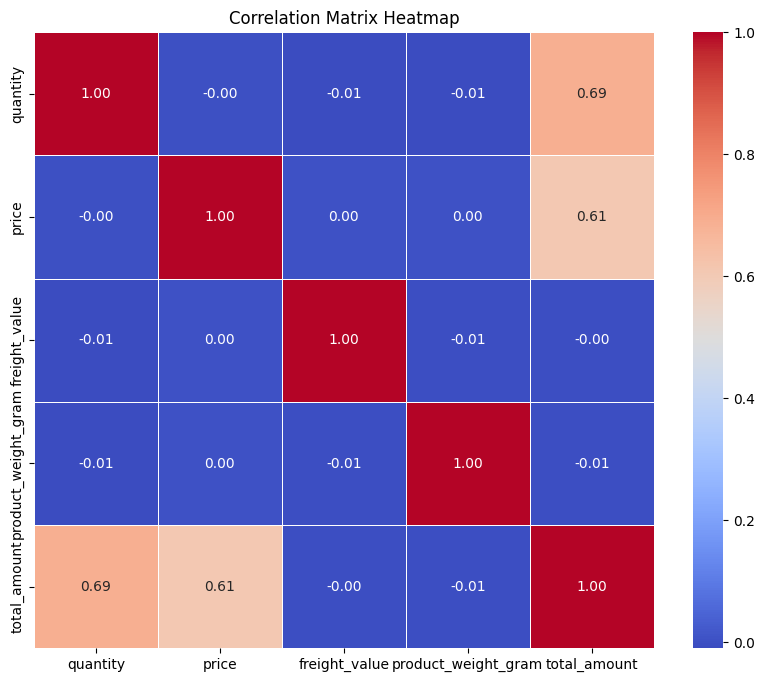

In [81]:
correlation_matrix = df_approved[['quantity', 'price', 'freight_value', 'product_weight_gram', 'total_amount']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

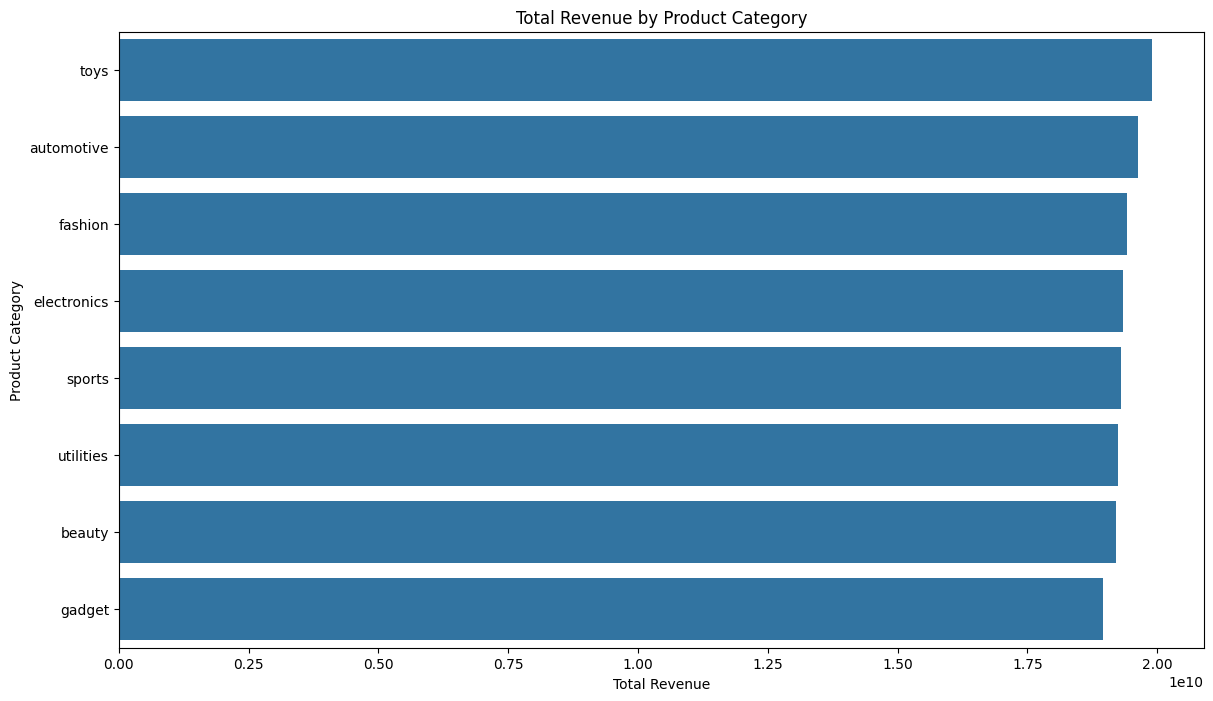

In [82]:
plt.figure(figsize=(14, 8))
sns.barplot(x='total_revenue', y='product_category_name', data=category_revenue.sort_values(by='total_revenue', ascending=False))
plt.title('Total Revenue by Product Category')
plt.xlabel('Total Revenue')
plt.ylabel('Product Category')
plt.show()

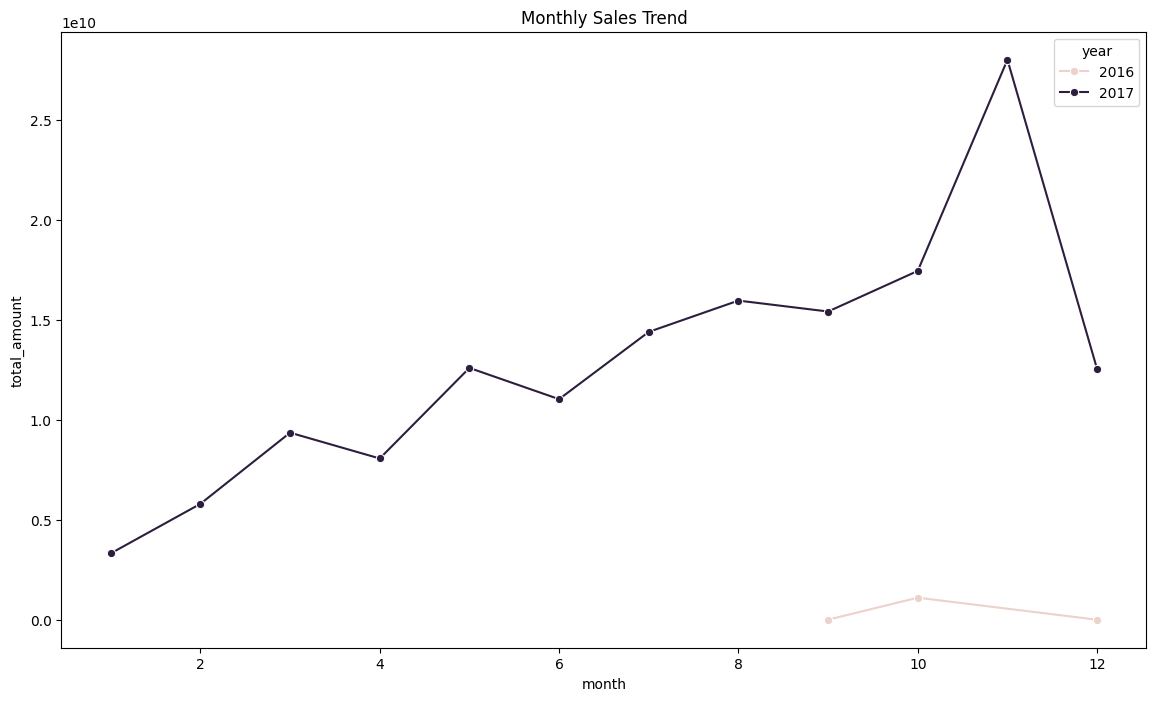

In [83]:
df_approved['purchase_date'] = pd.to_datetime(df_approved['purchase_date'], format='%d/%m/%Y')
df_approved['year'] = df_approved['purchase_date'].dt.year
df_approved['month'] = df_approved['purchase_date'].dt.month

monthly_sales = df_approved.groupby(['year', 'month'])['total_amount'].sum().reset_index()

plt.figure(figsize=(14, 8))
sns.lineplot(data=monthly_sales, x='month', y='total_amount', hue='year', marker='o')
plt.title('Monthly Sales Trend')
plt.show()

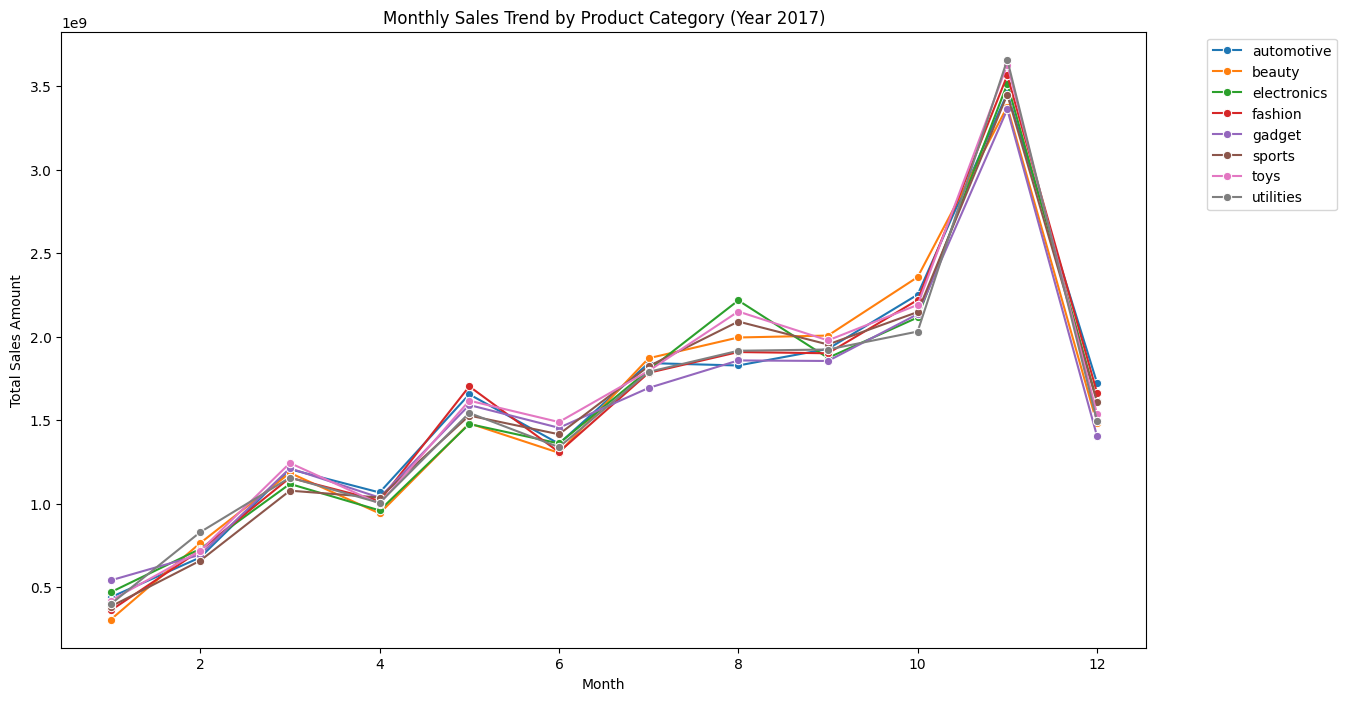

In [84]:
# Filter data for the year 2017
df_2017 = df_approved[df_approved['year'] == 2017]

# Group by product category, year, and month to get monthly sales
monthly_sales_2017 = df_2017.groupby(['product_category_name', 'month'])['total_amount'].sum().reset_index()

# Plotting monthly sales trend for each product category in 2017
plt.figure(figsize=(14, 8))
sns.lineplot(data=monthly_sales_2017, x='month', y='total_amount', hue='product_category_name', marker='o', palette='tab10')
plt.title('Monthly Sales Trend by Product Category (Year 2017)')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()